In [78]:
import pandas as pd
import networkx as nx
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [79]:
base = pd.read_json('../datasets/_authors_paper.json')
len(base)

2495

In [80]:
base['date_create']=base['date_create'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

In [81]:
# base = base[base['date_create'] < '2009-01-01']
# len(base)

In [82]:
base.head()

,author_idauthor,date_create,idauthor_paper,paper_idpaper
0,aoz45xyz12,2007-03-30,auz35ppr2,704.0002
1,aoz26xyz17,2007-03-30,auz70ppr11,704.0002
2,aoz55xyz4,2007-03-30,auz40ppr10,704.0002
3,aoz21xyz6,2007-03-30,auz25ppr19,704.0002
4,aoz40xyz14,2007-03-30,auz5ppr20,704.0002


In [83]:
G = nx.Graph()

In [84]:
for _, b in base.iterrows():
    if b['date_create'] <= datetime.datetime.strptime('2009-01-01', "%Y-%m-%d"):
        G.add_edge(b['author_idauthor'], 
                   b['idauthor_paper'],
                   papers=b['paper_idpaper'])

In [85]:
pos = nx.spring_layout(G)

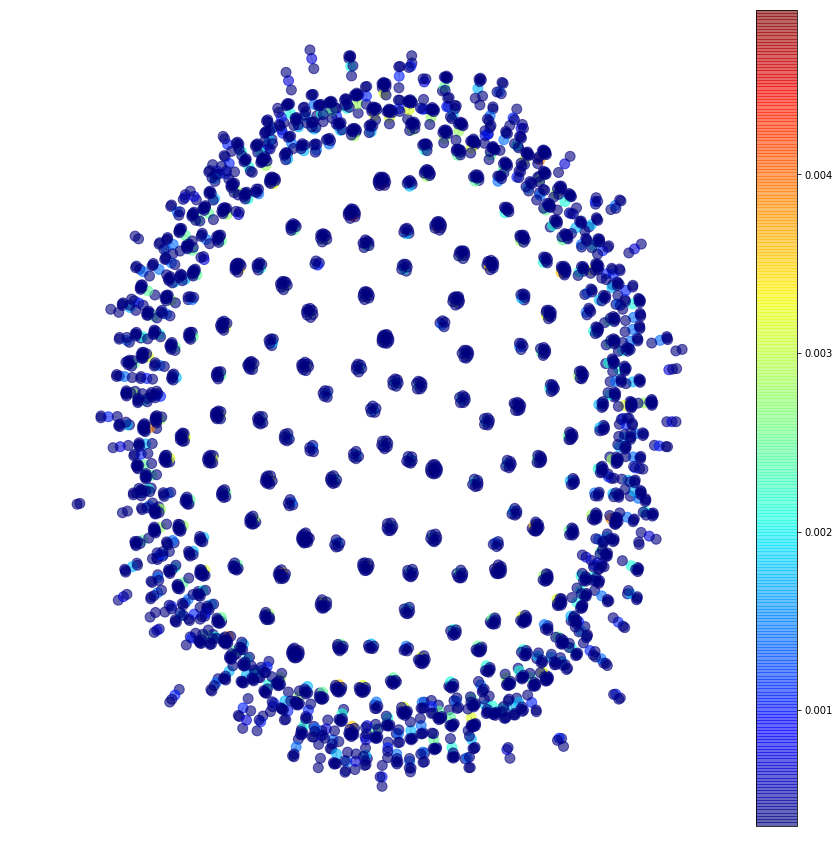

In [86]:
node_color = [cent for cent in nx.degree_centrality(G).values()]
node_size = [100 for node in G.nodes()]
plt.figure(figsize=(15,15))
ed = nx.draw_networkx_edges(G, pos=pos, alpha=0.3, edge_color='gray')
no = nx.draw_networkx_nodes(G, pos=pos, alpha=0.6, with_labels=False, node_color=node_color, 
                            cmap=cm.jet, vmin=min(list(nx.degree_centrality(G).values())), 
                            vmax=max(list(nx.degree_centrality(G).values())),
                            node_size=node_size)
plt.colorbar(no)
plt.axis('off')
plt.show()

In [87]:
length = nx.all_pairs_shortest_path_length(G)

In [88]:
distancias = [x for x in length]

In [89]:
authors_dist_2 = []
for a in distancias:
    principal = a[0]
    coautores = a[1]
    for co,va in coautores.items():
        if va == 2:
            authors_dist_2.append([principal, co])
print(authors_dist_2)

[['aoz45xyz12', 'aoz85xyz21'], ['aoz45xyz12', 'aoz27xyz3'], ['aoz45xyz12', 'aoz17xyz12'], ['aoz45xyz12', 'aoz89xyz21'], ['aoz45xyz12', 'aoz73xyz8'], ['aoz45xyz12', 'aoz67xyz20'], ['aoz45xyz12', 'aoz73xyz9'], ['aoz45xyz12', 'aoz84xyz11'], ['aoz26xyz17', 'aoz107xyz18'], ['aoz26xyz17', 'aoz33xyz24'], ['aoz26xyz17', 'aoz21xyz17'], ['aoz26xyz17', 'aoz17xyz14'], ['aoz26xyz17', 'aoz53xyz24'], ['aoz26xyz17', 'aoz47xyz17'], ['aoz26xyz17', 'aoz29xyz22'], ['aoz26xyz17', 'aoz42xyz18'], ['aoz55xyz4', 'aoz60xyz6'], ['aoz55xyz4', 'aoz29xyz25'], ['aoz21xyz6', 'aoz20xyz10'], ['aoz21xyz6', 'aoz81xyz9'], ['aoz21xyz6', 'aoz31xyz18'], ['aoz21xyz6', 'aoz8xyz17'], ['aoz21xyz6', 'aoz98xyz6'], ['aoz21xyz6', 'aoz23xyz15'], ['aoz21xyz6', 'aoz34xyz25'], ['aoz40xyz14', 'aoz73xyz18'], ['aoz40xyz14', 'aoz101xyz9'], ['aoz26xyz3', 'aoz88xyz13'], ['aoz26xyz3', 'aoz104xyz23'], ['aoz13xyz18', 'aoz90xyz5'], ['aoz13xyz18', 'aoz107xyz16'], ['aoz13xyz18', 'aoz101xyz5'], ['aoz13xyz18', 'aoz51xyz5'], ['aoz13xyz18', 'aoz80xyz22

In [90]:
G_futuro = nx.Graph()

In [91]:
for _, b in base.iterrows():
    if b['date_create'] > datetime.datetime.strptime('2007-12-31', "%Y-%m-%d"):
        G_futuro.add_edge(b['author_idauthor'], 
                           b['idauthor_paper'],
                           papers=b['paper_idpaper'])

In [92]:
G_futuro.nodes()

NodeView(('aoz59xyz8', 'auz5ppr7', 'aoz112xyz13', 'auz70ppr15', 'aoz20xyz31', 'auz65ppr7', 'aoz115xyz22', 'auz90ppr6', 'aoz130xyz35', 'auz95ppr6', 'aoz89xyz8', 'auz95ppr12', 'aoz76xyz26', 'auz100ppr8', 'aoz39xyz27', 'auz5ppr9', 'aoz111xyz26', 'auz35ppr5', 'aoz44xyz11', 'auz35ppr15', 'aoz33xyz8', 'auz95ppr3', 'aoz99xyz16', 'auz50ppr11', 'aoz39xyz23', 'auz45ppr5', 'aoz114xyz20', 'auz75ppr3', 'aoz29xyz6', 'auz40ppr13', 'aoz95xyz24', 'auz65ppr13', 'aoz104xyz7', 'auz50ppr14', 'aoz39xyz15', 'auz55ppr10', 'aoz110xyz6', 'auz85ppr9', 'aoz64xyz7', 'auz25ppr17', 'aoz29xyz21', 'auz5ppr16', 'aoz44xyz9', 'auz5ppr2', 'aoz73xyz20', 'auz70ppr5', 'aoz110xyz18', 'auz105ppr21', 'aoz29xyz24', 'auz30ppr17', 'aoz94xyz13', 'auz30ppr12', 'aoz15xyz23', 'auz80ppr3', 'aoz54xyz9', 'auz10ppr11', 'aoz104xyz11', 'auz70ppr18', 'aoz10xyz23', 'auz45ppr8', 'aoz20xyz22', 'auz5ppr8', 'aoz78xyz24', 'auz5ppr12', 'aoz20xyz23', 'auz15ppr21', 'aoz94xyz16', 'auz15ppr16', 'aoz59xyz16', 'auz90ppr13', 'aoz89xyz5', 'auz45ppr21', 'ao

In [93]:
pos = nx.spring_layout(G_futuro)

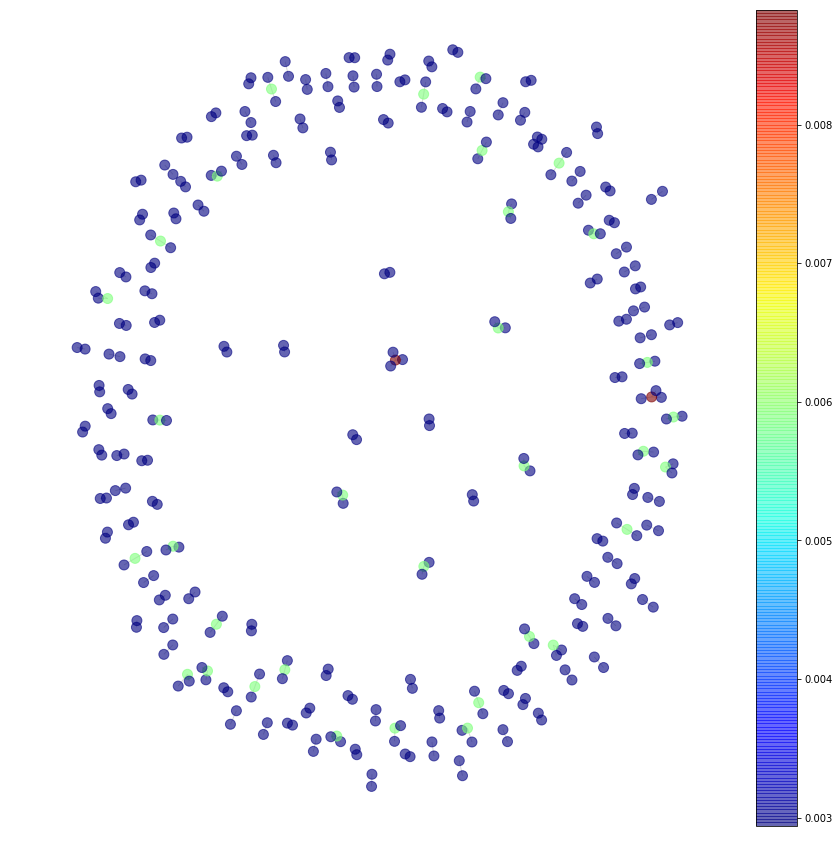

In [94]:
node_color = [cent for cent in nx.degree_centrality(G_futuro).values()]
node_size = [100 for node in G.nodes()]
plt.figure(figsize=(15,15))
ed = nx.draw_networkx_edges(G_futuro, pos=pos, alpha=0.3, edge_color='gray')
no = nx.draw_networkx_nodes(G_futuro, pos=pos, alpha=0.6, with_labels=False, node_color=node_color, 
                            cmap=cm.jet, vmin=min(list(nx.degree_centrality(G_futuro).values())), 
                            vmax=max(list(nx.degree_centrality(G_futuro).values())),
                            node_size=node_size)
plt.colorbar(no)
plt.axis('off')
plt.show()

In [104]:
authors_dist_2

[['aoz45xyz12', 'aoz85xyz21'],
 ['aoz45xyz12', 'aoz27xyz3'],
 ['aoz45xyz12', 'aoz17xyz12'],
 ['aoz45xyz12', 'aoz89xyz21'],
 ['aoz45xyz12', 'aoz73xyz8'],
 ['aoz45xyz12', 'aoz67xyz20'],
 ['aoz45xyz12', 'aoz73xyz9'],
 ['aoz45xyz12', 'aoz84xyz11'],
 ['aoz26xyz17', 'aoz107xyz18'],
 ['aoz26xyz17', 'aoz33xyz24'],
 ['aoz26xyz17', 'aoz21xyz17'],
 ['aoz26xyz17', 'aoz17xyz14'],
 ['aoz26xyz17', 'aoz53xyz24'],
 ['aoz26xyz17', 'aoz47xyz17'],
 ['aoz26xyz17', 'aoz29xyz22'],
 ['aoz26xyz17', 'aoz42xyz18'],
 ['aoz55xyz4', 'aoz60xyz6'],
 ['aoz55xyz4', 'aoz29xyz25'],
 ['aoz21xyz6', 'aoz20xyz10'],
 ['aoz21xyz6', 'aoz81xyz9'],
 ['aoz21xyz6', 'aoz31xyz18'],
 ['aoz21xyz6', 'aoz8xyz17'],
 ['aoz21xyz6', 'aoz98xyz6'],
 ['aoz21xyz6', 'aoz23xyz15'],
 ['aoz21xyz6', 'aoz34xyz25'],
 ['aoz40xyz14', 'aoz73xyz18'],
 ['aoz40xyz14', 'aoz101xyz9'],
 ['aoz26xyz3', 'aoz88xyz13'],
 ['aoz26xyz3', 'aoz104xyz23'],
 ['aoz13xyz18', 'aoz90xyz5'],
 ['aoz13xyz18', 'aoz107xyz16'],
 ['aoz13xyz18', 'aoz101xyz5'],
 ['aoz13xyz18', 'aoz51xy

In [95]:
ligacoes_futuras = pd.DataFrame(authors_dist_2, columns=['Author_1', 'Author_2'])

In [96]:
ligacoes_futuras.head()

,Author_1,Author_2
0,aoz45xyz12,aoz85xyz21
1,aoz45xyz12,aoz27xyz3
2,aoz45xyz12,aoz17xyz12
3,aoz45xyz12,aoz89xyz21
4,aoz45xyz12,aoz73xyz8


In [97]:
ligacoes_futuras['label'] = ligacoes_futuras.apply(
    lambda lig: G_futuro.has_edge(lig['Author_1'], lig['Author_2']), axis=1)

In [112]:
coefs = nx.jaccard_coefficient(G, authors_dist_2)


In [114]:
for u, v, p in coefs:
    print((u, v, p))

('aoz45xyz12', 'aoz27xyz3', 1.0)
('aoz45xyz12', 'aoz17xyz12', 1.0)
('aoz45xyz12', 'aoz89xyz21', 1.0)
('aoz45xyz12', 'aoz73xyz8', 1.0)
('aoz45xyz12', 'aoz67xyz20', 1.0)
('aoz45xyz12', 'aoz73xyz9', 1.0)
('aoz45xyz12', 'aoz84xyz11', 1.0)
('aoz26xyz17', 'aoz107xyz18', 1.0)
('aoz26xyz17', 'aoz33xyz24', 1.0)
('aoz26xyz17', 'aoz21xyz17', 1.0)
('aoz26xyz17', 'aoz17xyz14', 1.0)
('aoz26xyz17', 'aoz53xyz24', 1.0)
('aoz26xyz17', 'aoz47xyz17', 1.0)
('aoz26xyz17', 'aoz29xyz22', 1.0)
('aoz26xyz17', 'aoz42xyz18', 1.0)
('aoz55xyz4', 'aoz60xyz6', 1.0)
('aoz55xyz4', 'aoz29xyz25', 1.0)
('aoz21xyz6', 'aoz20xyz10', 1.0)
('aoz21xyz6', 'aoz81xyz9', 1.0)
('aoz21xyz6', 'aoz31xyz18', 1.0)
('aoz21xyz6', 'aoz8xyz17', 1.0)
('aoz21xyz6', 'aoz98xyz6', 1.0)
('aoz21xyz6', 'aoz23xyz15', 1.0)
('aoz21xyz6', 'aoz34xyz25', 1.0)
('aoz40xyz14', 'aoz73xyz18', 1.0)
('aoz40xyz14', 'aoz101xyz9', 1.0)
('aoz26xyz3', 'aoz88xyz13', 1.0)
('aoz26xyz3', 'aoz104xyz23', 1.0)
('aoz13xyz18', 'aoz90xyz5', 1.0)
('aoz13xyz18', 'aoz107xyz16', 1

('aoz76xyz12', 'aoz80xyz13', 1.0)
('aoz76xyz12', 'aoz72xyz7', 1.0)
('aoz76xyz12', 'aoz58xyz23', 1.0)
('aoz76xyz12', 'aoz88xyz17', 1.0)
('aoz96xyz2', 'aoz40xyz16', 1.0)
('aoz96xyz2', 'aoz92xyz10', 1.0)
('aoz96xyz2', 'aoz80xyz4', 1.0)
('aoz96xyz2', 'aoz79xyz19', 1.0)
('aoz96xyz2', 'aoz71xyz22', 1.0)
('aoz96xyz2', 'aoz78xyz21', 1.0)
('aoz96xyz2', 'aoz78xyz13', 1.0)
('aoz100xyz11', 'aoz50xyz4', 1.0)
('aoz100xyz11', 'aoz45xyz6', 1.0)
('aoz100xyz11', 'aoz61xyz2', 1.0)
('aoz100xyz11', 'aoz98xyz4', 1.0)
('aoz100xyz11', 'aoz47xyz16', 1.0)
('aoz100xyz11', 'aoz19xyz9', 1.0)
('aoz102xyz20', 'aoz42xyz16', 1.0)
('aoz102xyz20', 'aoz79xyz13', 1.0)
('aoz102xyz20', 'aoz108xyz18', 1.0)
('aoz102xyz20', 'aoz14xyz24', 1.0)
('aoz102xyz20', 'aoz19xyz22', 1.0)
('aoz76xyz4', 'aoz15xyz15', 1.0)
('aoz76xyz4', 'aoz103xyz6', 1.0)
('aoz76xyz4', 'aoz12xyz26', 1.0)
('aoz5xyz6', 'aoz82xyz16', 1.0)
('aoz5xyz6', 'aoz107xyz8', 1.0)
('aoz5xyz6', 'aoz42xyz10', 1.0)
('aoz5xyz6', 'aoz102xyz9', 1.0)
('aoz5xyz6', 'aoz107xyz11',

('aoz81xyz9', 'aoz20xyz10', 1.0)
('aoz81xyz9', 'aoz31xyz18', 1.0)
('aoz81xyz9', 'aoz8xyz17', 1.0)
('aoz81xyz9', 'aoz98xyz6', 1.0)
('aoz81xyz9', 'aoz23xyz15', 1.0)
('aoz81xyz9', 'aoz34xyz25', 1.0)
('aoz42xyz10', 'aoz82xyz16', 1.0)
('aoz42xyz10', 'aoz5xyz6', 1.0)
('aoz42xyz10', 'aoz107xyz8', 1.0)
('aoz42xyz10', 'aoz102xyz9', 1.0)
('aoz42xyz10', 'aoz107xyz11', 1.0)
('aoz42xyz10', 'aoz81xyz8', 1.0)
('aoz42xyz10', 'aoz108xyz13', 1.0)
('aoz42xyz10', 'aoz108xyz23', 1.0)
('aoz42xyz10', 'aoz84xyz19', 1.0)
('aoz42xyz10', 'aoz58xyz19', 1.0)
('aoz86xyz11', 'aoz86xyz10', 1.0)
('aoz86xyz11', 'aoz57xyz22', 1.0)
('aoz86xyz11', 'aoz101xyz19', 1.0)
('aoz86xyz11', 'aoz7xyz13', 1.0)
('aoz86xyz11', 'aoz32xyz12', 1.0)
('aoz86xyz11', 'aoz51xyz18', 1.0)
('aoz86xyz11', 'aoz98xyz8', 1.0)
('aoz107xyz15', 'aoz82xyz21', 1.0)
('aoz107xyz15', 'aoz106xyz24', 1.0)
('aoz107xyz15', 'aoz103xyz14', 1.0)
('aoz47xyz11', 'aoz57xyz17', 1.0)
('aoz47xyz11', 'aoz29xyz14', 1.0)
('aoz47xyz11', 'aoz68xyz9', 1.0)
('aoz26xyz18', 'aoz

('aoz45xyz3', 'aoz33xyz14', 1.0)
('aoz45xyz3', 'aoz27xyz18', 1.0)
('aoz45xyz3', 'aoz93xyz4', 1.0)
('aoz45xyz3', 'aoz64xyz13', 1.0)
('aoz45xyz3', 'aoz49xyz18', 1.0)
('aoz45xyz3', 'aoz89xyz18', 1.0)
('aoz45xyz3', 'aoz64xyz17', 1.0)
('aoz21xyz20', 'aoz25xyz16', 1.0)
('aoz21xyz20', 'aoz70xyz9', 1.0)
('aoz21xyz20', 'aoz57xyz7', 1.0)
('aoz21xyz20', 'aoz95xyz26', 1.0)
('aoz21xyz20', 'aoz83xyz29', 1.0)
('aoz81xyz4', 'aoz73xyz5', 1.0)
('aoz42xyz21', 'aoz30xyz21', 1.0)
('aoz42xyz21', 'aoz92xyz19', 1.0)
('aoz42xyz21', 'aoz23xyz6', 1.0)
('aoz42xyz21', 'aoz72xyz18', 1.0)
('aoz42xyz21', 'aoz43xyz22', 1.0)
('aoz42xyz21', 'aoz18xyz4', 1.0)
('aoz42xyz21', 'aoz103xyz13', 1.0)
('aoz42xyz21', 'aoz82xyz33', 1.0)
('aoz106xyz7', 'aoz25xyz15', 1.0)
('aoz106xyz7', 'aoz68xyz4', 1.0)
('aoz106xyz7', 'aoz67xyz5', 1.0)
('aoz106xyz7', 'aoz55xyz7', 1.0)
('aoz106xyz7', 'aoz53xyz22', 1.0)
('aoz106xyz7', 'aoz93xyz11', 1.0)
('aoz106xyz7', 'aoz51xyz27', 1.0)
('aoz106xyz7', 'aoz99xyz17', 1.0)
('aoz66xyz19', 'aoz106xyz6', 1

('aoz68xyz18', 'aoz26xyz26', 1.0)
('aoz45xyz17', 'aoz96xyz20', 1.0)
('aoz45xyz17', 'aoz62xyz5', 1.0)
('aoz45xyz17', 'aoz46xyz8', 1.0)
('aoz45xyz17', 'aoz65xyz3', 1.0)
('aoz45xyz17', 'aoz99xyz5', 1.0)
('aoz45xyz17', 'aoz48xyz16', 1.0)
('aoz45xyz17', 'aoz104xyz6', 1.0)
('aoz45xyz17', 'aoz75xyz25', 1.0)
('aoz14xyz17', 'aoz68xyz10', 1.0)
('aoz14xyz17', 'aoz59xyz25', 1.0)
('aoz14xyz17', 'aoz52xyz24', 1.0)
('aoz35xyz8', 'aoz11xyz5', 1.0)
('aoz35xyz8', 'aoz101xyz10', 1.0)
('aoz35xyz8', 'aoz19xyz6', 1.0)
('aoz35xyz8', 'aoz103xyz4', 1.0)
('aoz35xyz8', 'aoz68xyz22', 1.0)
('aoz35xyz8', 'aoz87xyz15', 1.0)
('aoz60xyz12', 'aoz63xyz16', 1.0)
('aoz60xyz12', 'aoz35xyz1', 1.0)
('aoz60xyz12', 'aoz53xyz32', 1.0)
('aoz60xyz12', 'aoz108xyz15', 1.0)
('aoz60xyz12', 'aoz97xyz3', 1.0)
('aoz60xyz12', 'aoz73xyz25', 1.0)
('aoz36xyz5', 'aoz25xyz2', 1.0)
('aoz36xyz5', 'aoz32xyz16', 1.0)
('aoz36xyz5', 'aoz21xyz5', 1.0)
('aoz36xyz5', 'aoz14xyz21', 1.0)
('aoz36xyz5', 'aoz33xyz32', 1.0)
('aoz36xyz5', 'aoz39xyz17', 1.0)


('aoz43xyz6', 'aoz87xyz20', 1.0)
('aoz43xyz6', 'aoz69xyz25', 1.0)
('aoz21xyz11', 'aoz73xyz11', 1.0)
('aoz21xyz11', 'aoz72xyz19', 1.0)
('aoz21xyz11', 'aoz66xyz13', 1.0)
('aoz21xyz11', 'aoz97xyz38', 1.0)
('aoz21xyz11', 'aoz7xyz16', 1.0)
('aoz44xyz17', 'aoz95xyz15', 1.0)
('aoz44xyz17', 'aoz25xyz9', 1.0)
('aoz44xyz17', 'aoz85xyz5', 1.0)
('aoz44xyz17', 'aoz48xyz20', 1.0)
('aoz44xyz17', 'aoz33xyz21', 1.0)
('aoz44xyz17', 'aoz68xyz11', 1.0)
('aoz44xyz17', 'aoz114xyz21', 1.0)
('aoz44xyz17', 'aoz10xyz26', 1.0)
('aoz42xyz8', 'aoz6xyz3', 1.0)
('aoz42xyz8', 'aoz61xyz15', 1.0)
('aoz42xyz8', 'aoz49xyz7', 1.0)
('aoz42xyz8', 'aoz96xyz12', 1.0)
('aoz42xyz8', 'aoz63xyz21', 1.0)
('aoz42xyz8', 'aoz54xyz14', 1.0)
('aoz5xyz3', 'aoz40xyz4', 1.0)
('aoz5xyz3', 'aoz21xyz9', 1.0)
('aoz5xyz3', 'aoz52xyz15', 1.0)
('aoz26xyz22', 'aoz41xyz7', 1.0)
('aoz26xyz22', 'aoz55xyz3', 1.0)
('aoz26xyz22', 'aoz26xyz8', 1.0)
('aoz26xyz22', 'aoz105xyz10', 1.0)
('aoz26xyz22', 'aoz6xyz10', 1.0)
('aoz26xyz22', 'aoz16xyz16', 1.0)
('ao

('aoz83xyz16', 'aoz39xyz27', 1.0)
('aoz45xyz14', 'aoz55xyz19', 1.0)
('aoz45xyz14', 'aoz102xyz7', 1.0)
('aoz45xyz14', 'aoz85xyz12', 1.0)
('aoz45xyz14', 'aoz60xyz25', 1.0)
('aoz45xyz14', 'aoz63xyz13', 1.0)
('aoz33xyz18', 'aoz62xyz17', 1.0)
('aoz33xyz18', 'aoz76xyz9', 1.0)
('aoz33xyz18', 'aoz11xyz4', 1.0)
('aoz33xyz18', 'aoz80xyz16', 1.0)
('aoz33xyz18', 'aoz109xyz23', 1.0)
('aoz33xyz18', 'aoz24xyz20', 1.0)
('aoz33xyz18', 'aoz53xyz26', 1.0)
('aoz30xyz26', 'aoz37xyz5', 1.0)
('aoz30xyz26', 'aoz20xyz14', 1.0)
('aoz30xyz26', 'aoz25xyz20', 1.0)
('aoz30xyz26', 'aoz108xyz5', 1.0)
('aoz84xyz19', 'aoz82xyz16', 1.0)
('aoz84xyz19', 'aoz5xyz6', 1.0)
('aoz84xyz19', 'aoz107xyz8', 1.0)
('aoz84xyz19', 'aoz42xyz10', 1.0)
('aoz84xyz19', 'aoz102xyz9', 1.0)
('aoz84xyz19', 'aoz107xyz11', 1.0)
('aoz84xyz19', 'aoz81xyz8', 1.0)
('aoz84xyz19', 'aoz108xyz13', 1.0)
('aoz84xyz19', 'aoz108xyz23', 1.0)
('aoz84xyz19', 'aoz58xyz19', 1.0)
('aoz54xyz21', 'aoz70xyz13', 1.0)
('aoz54xyz21', 'aoz12xyz22', 1.0)
('aoz54xyz21', '

('aoz108xyz5', 'aoz20xyz14', 1.0)
('aoz108xyz5', 'aoz30xyz26', 1.0)
('aoz108xyz5', 'aoz25xyz20', 1.0)
('aoz33xyz6', 'aoz50xyz19', 1.0)
('aoz33xyz6', 'aoz42xyz9', 1.0)
('aoz33xyz6', 'aoz18xyz12', 1.0)
('aoz33xyz6', 'aoz61xyz17', 1.0)
('aoz33xyz6', 'aoz93xyz17', 1.0)
('aoz12xyz12', 'aoz91xyz18', 1.0)
('aoz12xyz12', 'aoz56xyz3', 1.0)
('aoz12xyz12', 'aoz76xyz20', 1.0)
('aoz12xyz12', 'aoz26xyz5', 1.0)
('aoz12xyz12', 'aoz101xyz6', 1.0)
('aoz28xyz4', 'aoz91xyz17', 1.0)
('aoz28xyz4', 'aoz87xyz7', 1.0)
('aoz28xyz4', 'aoz33xyz10', 1.0)
('aoz28xyz4', 'aoz83xyz13', 1.0)
('aoz53xyz12', 'aoz20xyz20', 1.0)
('aoz53xyz12', 'aoz60xyz3', 1.0)
('aoz53xyz12', 'aoz20xyz11', 1.0)
('aoz53xyz12', 'aoz12xyz11', 1.0)
('aoz53xyz12', 'aoz46xyz16', 1.0)
('aoz53xyz12', 'aoz101xyz2', 1.0)
('aoz53xyz12', 'aoz93xyz32', 1.0)
('aoz53xyz12', 'aoz112xyz27', 1.0)
('aoz44xyz14', 'aoz102xyz3', 1.0)
('aoz44xyz14', 'aoz100xyz4', 1.0)
('aoz44xyz14', 'aoz92xyz5', 1.0)
('aoz44xyz14', 'aoz73xyz16', 1.0)
('aoz44xyz14', 'aoz21xyz32',

('aoz106xyz25', 'aoz40xyz21', 1.0)
('aoz106xyz25', 'aoz32xyz25', 1.0)
('aoz106xyz25', 'aoz94xyz23', 1.0)
('aoz106xyz25', 'aoz109xyz19', 1.0)
('aoz108xyz9', 'aoz80xyz18', 1.0)
('aoz108xyz9', 'aoz20xyz7', 1.0)
('aoz108xyz9', 'aoz50xyz17', 1.0)
('aoz108xyz9', 'aoz28xyz11', 1.0)
('aoz108xyz9', 'aoz64xyz5', 1.0)
('aoz108xyz9', 'aoz94xyz13', 1.0)
('aoz98xyz5', 'aoz26xyz12', 1.0)
('aoz98xyz5', 'aoz27xyz14', 1.0)
('aoz98xyz5', 'aoz36xyz3', 1.0)
('aoz98xyz5', 'aoz61xyz7', 1.0)
('aoz98xyz5', 'aoz14xyz18', 1.0)
('aoz98xyz5', 'aoz99xyz12', 1.0)
('aoz98xyz5', 'aoz42xyz25', 1.0)
('aoz98xyz5', 'aoz35xyz25', 1.0)
('aoz34xyz17', 'aoz30xyz17', 1.0)
('aoz34xyz17', 'aoz62xyz14', 1.0)
('aoz79xyz11', 'aoz78xyz9', 1.0)
('aoz79xyz11', 'aoz15xyz4', 1.0)
('aoz79xyz11', 'aoz93xyz22', 1.0)
('aoz79xyz11', 'aoz19xyz25', 1.0)
('aoz79xyz11', 'aoz63xyz9', 1.0)
('aoz79xyz11', 'aoz110xyz14', 1.0)
('aoz63xyz13', 'aoz55xyz19', 1.0)
('aoz63xyz13', 'aoz102xyz7', 1.0)
('aoz63xyz13', 'aoz85xyz12', 1.0)
('aoz63xyz13', 'aoz45xy

('aoz93xyz32', 'aoz20xyz11', 1.0)
('aoz93xyz32', 'aoz12xyz11', 1.0)
('aoz93xyz32', 'aoz46xyz16', 1.0)
('aoz93xyz32', 'aoz101xyz2', 1.0)
('aoz93xyz32', 'aoz53xyz12', 1.0)
('aoz93xyz32', 'aoz112xyz27', 1.0)
('aoz116xyz17', 'aoz36xyz7', 1.0)
('aoz116xyz17', 'aoz96xyz22', 1.0)
('aoz116xyz17', 'aoz6xyz15', 1.0)
('aoz116xyz17', 'aoz64xyz24', 1.0)
('aoz116xyz17', 'aoz33xyz4', 1.0)
('aoz116xyz17', 'aoz87xyz9', 1.0)
('aoz116xyz17', 'aoz26xyz25', 1.0)
('aoz33xyz32', 'aoz25xyz2', 1.0)
('aoz33xyz32', 'aoz32xyz16', 1.0)
('aoz33xyz32', 'aoz21xyz5', 1.0)
('aoz33xyz32', 'aoz36xyz5', 1.0)
('aoz33xyz32', 'aoz14xyz21', 1.0)
('aoz33xyz32', 'aoz39xyz17', 1.0)
('aoz94xyz15', 'aoz60xyz5', 1.0)
('aoz94xyz15', 'aoz75xyz13', 1.0)
('aoz94xyz15', 'aoz72xyz11', 1.0)
('aoz94xyz15', 'aoz72xyz13', 1.0)
('aoz94xyz15', 'aoz23xyz34', 1.0)
('aoz94xyz15', 'aoz15xyz23', 1.0)
('aoz94xyz15', 'aoz23xyz33', 1.0)
('aoz77xyz25', 'aoz14xyz10', 1.0)
('aoz77xyz25', 'aoz40xyz2', 1.0)
('aoz77xyz25', 'aoz77xyz5', 1.0)
('aoz77xyz25', '